In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

In [49]:
# Output File (CSV)
#output_data_file = "output_data/california_fire_cleaned.csv"

##switch to using this file, which has dropped columns we aren't using

In [50]:
#load in file
#fire_data_file = "Resources/California_Fire_Incidents.csv"

#read and display csv with Pandas 
fire_data_df = pd.read_csv("output_data/california_fire_cleaned.csv")
fire_data_df.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,MajorIncident,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders
0,257314.0,NaN,2013,Tuolumne,55,NaN,NaN,NaN,9/6/13,20,...,False,Rim Fire,NaN,8/17/13,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN
1,30274.0,NaN,2013,Los Angeles,19,NaN,NaN,NaN,6/8/13,9,...,False,Powerhouse Fire,NaN,5/30/13,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN
2,27531.0,NaN,2013,Riverside,33,NaN,NaN,NaN,7/30/13,15,...,False,Mountain Fire,NaN,7/15/13,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN
3,27440.0,NaN,2013,Placer,31,NaN,NaN,NaN,8/30/13,20,...,False,American Fire,NaN,8/10/13,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN
4,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,True,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0


In [51]:
#list all of the columns in the table
fire_data_df.columns

Index(['AcresBurned', 'AirTankers', 'ArchiveYear', 'Counties', 'CountyIds',
       'CrewsInvolved', 'Dozers', 'Engines', 'Extinguished', 'Days Burned',
       'Fatalities', 'Featured', 'Final', 'Helicopters', 'Injuries',
       'Latitude', 'Longitude', 'MajorIncident', 'Name', 'PersonnelInvolved',
       'Started', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId',
       'WaterTenders'],
      dtype='object')

In [113]:
county_count = fire_data_df["Counties"].value_counts()
county_count
county_df = pd.DataFrame(county_count)
county_df

,Counties
Riverside,146
San Diego,89
Butte,66
San Luis Obispo,64
Shasta,64
Kern,62
Fresno,57
Siskiyou,57
San Bernardino,53
Tehama,51


In [34]:
#list unique counties
county_names = fire_data_df["Counties"].unique()
county_names

array(['Tuolumne', 'Los Angeles', 'Riverside', 'Placer', 'Ventura',
       'Fresno', 'Siskiyou', 'Humboldt', 'Tehama', 'Shasta', 'San Diego',
       'Kern', 'Sonoma', 'Contra Costa', 'Butte', 'Tulare',
       'Santa Barbara', 'Mariposa', 'Monterey', 'El Dorado',
       'San Bernardino', 'Plumas', 'Modoc', 'San Luis Obispo', 'Madera',
       'Inyo', 'Napa', 'San Benito', 'San Joaquin', 'Lake', 'Alameda',
       'Glenn', 'Yolo', 'Sacramento', 'Stanislaus', 'Solano', 'Merced',
       'Mendocino', 'Lassen', 'Amador', 'Yuba', 'Nevada', 'Santa Clara',
       'Calaveras', 'San Mateo', 'Orange', 'Colusa', 'Trinity',
       'Del Norte', 'Mono', 'Alpine', 'Sutter', 'Kings', 'Sierra',
       'Santa Cruz', 'Marin', 'Mexico', 'State of Oregon',
       'State of Nevada'], dtype=object)

In [ ]:
#add count of fires as a column??

In [114]:
#find top ten counties for total fire count
top_ten_counties = county_df.head(10)
top_ten_counties

,Counties
Riverside,146
San Diego,89
Butte,66
San Luis Obispo,64
Shasta,64
Kern,62
Fresno,57
Siskiyou,57
San Bernardino,53
Tehama,51


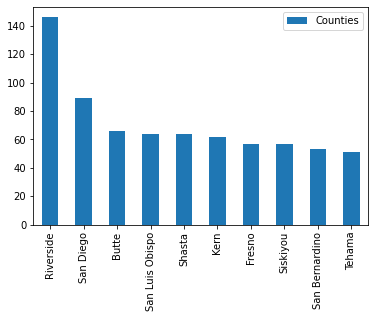

In [115]:
top_ten_counties.plot(kind="bar")
plt.show()

In [111]:
#bar chart for showing top ten counties for total fire count
# x_axis = np.arange(len(top_ten_counties))
# plt.bar(x_axis, top_ten_counties["Counties"])
# plt.xticks(top_ten_counties["index"], rotation="vertical")

In [70]:
#find last ten counties for total fire incidents
last_ten_counties = county_df.tail(10)
last_ten_counties

,Counties
Marin,6
Kings,5
Santa Cruz,4
Sutter,3
San Mateo,3
Mexico,2
Alpine,2
Sierra,2
State of Nevada,1
State of Oregon,1


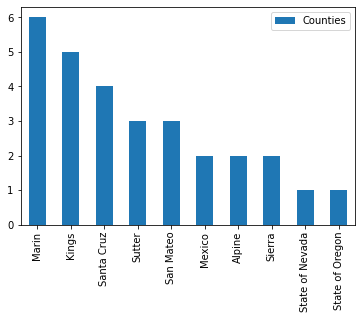

In [112]:
last_ten_counties.plot(kind="bar")
plt.show()

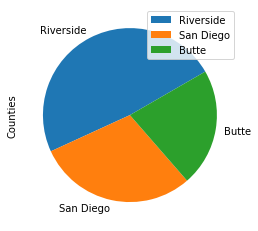

In [127]:
#pie chart to show top three fire count counties 
top_three_counties = county_df.head(3)
top_three_counties

total_county_pie = top_three_counties.plot(kind="pie", subplots=True, startangle=30)

plt.show()

In [134]:
#find count of fires deemed a major incident in each county, using "MajorIncident" column

county_major_df = fire_data_df.groupby(["Counties"])["MajorIncident"].sum().reset_index().sort_values(by= "MajorIncident", ascending= False)
county_major_df

#add in county_count to compare total fires vs. major incidents

# major_all_df = pd.DataFrame({"Counties" : county_names, 
#                "Total Fires" : county_count, 
#                "Major Fires" : major_incident_count})
# major_all_df

,Counties,MajorIncident
3,Butte,28.0
36,San Diego,27.0
43,Shasta,26.0
15,Lake,21.0
32,Riverside,18.0
27,Napa,16.0
8,El Dorado,15.0
20,Mariposa,14.0
9,Fresno,12.0
52,Tehama,11.0


In [40]:
#chart top five counties with 12 or more major fires
major_incident_count.loc[(major_incident_count["MajorIncident"]>=12), ["Counties", "MajorIncident"]]

,Counties,MajorIncident
3,Butte,28.0
36,San Diego,27.0
43,Shasta,26.0
15,Lake,21.0
32,Riverside,18.0
27,Napa,16.0
8,El Dorado,15.0
20,Mariposa,14.0
9,Fresno,12.0


In [135]:
#find top ten counties with major incidents from county_major_df

top_ten_major = county_major_df.head(10)
top_ten_major

#find top ten counties for total fire count
# top_ten_counties = county_df.head(10)
# top_ten_counties


,Counties,MajorIncident
3,Butte,28.0
36,San Diego,27.0
43,Shasta,26.0
15,Lake,21.0
32,Riverside,18.0
27,Napa,16.0
8,El Dorado,15.0
20,Mariposa,14.0
9,Fresno,12.0
52,Tehama,11.0


In [136]:
#find bottom ten counties with major incidents from county_major_df

last_ten_major = county_major_df.tail(10)
last_ten_major

##should I use only counties that had at least one major incident? 

,Counties,MajorIncident
48,Stanislaus,0.0
49,State of Nevada,0.0
37,San Joaquin,0.0
51,Sutter,0.0
1,Alpine,0.0
23,Mexico,0.0
31,Plumas,0.0
44,Sierra,0.0
7,Del Norte,0.0
50,State of Oregon,0.0
